In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt

%matplotlib inline

# Load GYM environment

In [4]:
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=False)

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print(f'States: {NUM_STATES}')
print(f'Actions: {NUM_ACTIONS}')

States: 16
Actions: 4


# Settings

In [5]:
lr = .8
gamma = .95

NUM_EPISODES = 3000
MAX_STEPS = 100
REWARD_AVERAGE_WINDOW = 20

# Q-Table initialization

In [6]:
Q = np.zeros([NUM_STATES, NUM_ACTIONS])

pathLenList = []
toralRewardList = []
totalRewardAveragesList = []

# Q-Table learning

In [14]:
for i in range(NUM_EPISODES):
    eps = 1.0 - float(i) / NUM_EPISODES
    
    s = env.reset()
    
    totalReward = 0
    step = 0
    
    while step < MAX_STEPS:
        step += 1
        
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[s, :])
        s1, r, done, _ = env.step(a)
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1, :])
        Q[s, a] = (1 - lr) * Q[s, a] + lr * Q_target
        
        totalReward += r
        s = s1
        if done:
            break
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    
    if i % REWARD_AVERAGE_WINDOW == 0 and i >= REWARD_AVERAGE_WINDOW:
        totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
        totalRewardAveragesList.append(totalRewardAverage)
        if i % 100 == 0:
            print('Episode {}: average total reward = {}').format(i, totalRewardAverage)

ValueError: too many values to unpack (expected 4)

# Q-Table

In [17]:
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


# Plot trajectory length lover time

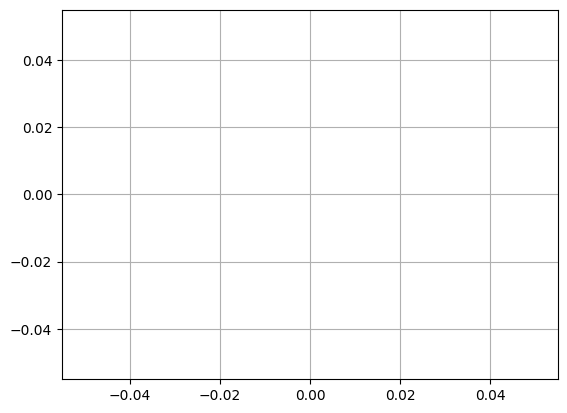

In [18]:
plt.plot(pathLenList)
plt.grid()

# Plot average total reward over time

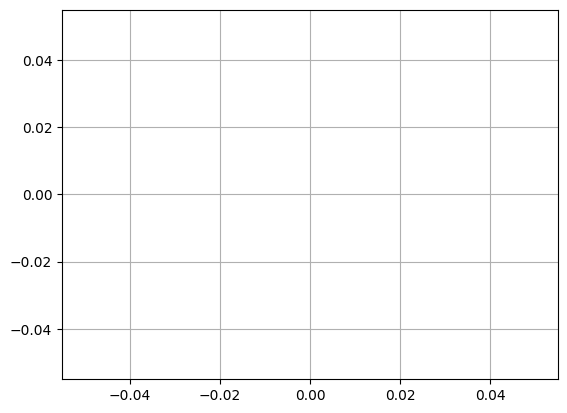

In [19]:
plt.plot(totalRewardAveragesList)
plt.grid()

# Run similation

In [21]:
USE_Q = True

s = env.reset()

for _ in range(1000):
    env.render()
    if USE_Q:
        a = np.argmax(Q[s,:])
    else:
        a = env.action_space.sample()
    s, r, done, _ = env.step(a)[:4]
    if done:
        print(f'Reward = {r}')
env.close()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices